# **Online Retail Sales and Customer Data**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import geopandas as gpd
import clean_dataset as cld

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
# import plotly.graph_objs as go
# import plotly.express as px
# from plotly.subplots import make_subplots

#machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

In [2]:
df_sales = pd.read_csv('dataset/online_retail.csv')

# Exploratory Data Analysis

In [3]:
df_sales.head(10)

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [4]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        541909 non-null  int64  
 1   InvoiceNo    541909 non-null  object 
 2   StockCode    541909 non-null  object 
 3   Description  540455 non-null  object 
 4   Quantity     541909 non-null  int64  
 5   InvoiceDate  541909 non-null  object 
 6   UnitPrice    541909 non-null  float64
 7   CustomerID   406829 non-null  float64
 8   Country      541909 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 37.2+ MB


The majority of my columns have object type


There are two columns that have NaN values:
- Description
- CustomerID

In [5]:
df_sales.describe()

,index,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,541909.000000,406829.000000
mean,270954.000000,9.552250,4.611114,15287.690570
std,156435.797851,218.081158,96.759853,1713.600303
min,0.000000,-80995.000000,-11062.060000,12346.000000
25%,135477.000000,1.000000,1.250000,13953.000000
50%,270954.000000,3.000000,2.080000,15152.000000
75%,406431.000000,10.000000,4.130000,16791.000000
max,541908.000000,80995.000000,38970.000000,18287.000000


There is a problem with Quantity and UnitPrice column, they have this min and max value:


| **Column**   | **Minimum Value** | **Maximum Value** |
|---------------|-------------------|--------------------|
| Quantity      | -80995.000000     | 80995.000000       |
| UnitPrice     | -11062.060000     | 38970.000000       |


In [6]:
df_sales.shape

(541909, 9)

# Cleaning up the dataset

In [1]:
# This is my clean dataset with no null values

df_sales = cld.clean_dataset()
df_sales

NameError: name 'cld' is not defined

### Outliers

In [23]:
# Functions for the plot of the outlier
def box_and_scatter_plot(df, df_column):
    fig, axs = plt.subplots(1, 2, figsize = (10, 5))

    # Create a box plot in the first subplot
    sns.boxplot(x=df[df_column], ax = axs[0])
    axs[0].set_xlabel(df_column)
    axs[0].set_title('Box Plot of ' + df_column + ' to Identify Outliers')

    # Create a scatter plot in the second subplot
    sns.scatterplot(x = df.index, y = df[df_column], ax=axs[1])
    axs[1].set_xlabel('Index')
    axs[1].set_ylabel(df_column)
    axs[1].set_title('Scatter Plot of ' + df_column + ' to Identify Outliers')

    # Adjust the layout
    plt.tight_layout()

    # Show the plots
    plt.show()

#### Quantity

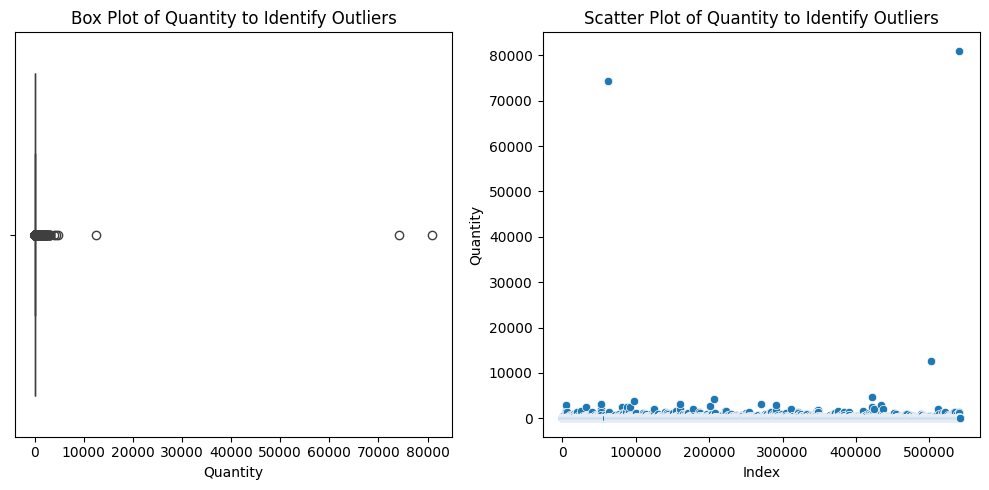

In [24]:
box_and_scatter_plot(df_sales, 'Quantity')

In [25]:
df_sales[df_sales['Quantity'] >= 10000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Time,Day,Month,Year,TotalSales,Season
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,10:01:00,18,1,2011,77183.6,Winter
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom,15:57:00,25,11,2011,0.0,Autumn
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,09:15:00,9,12,2011,168469.6,Winter


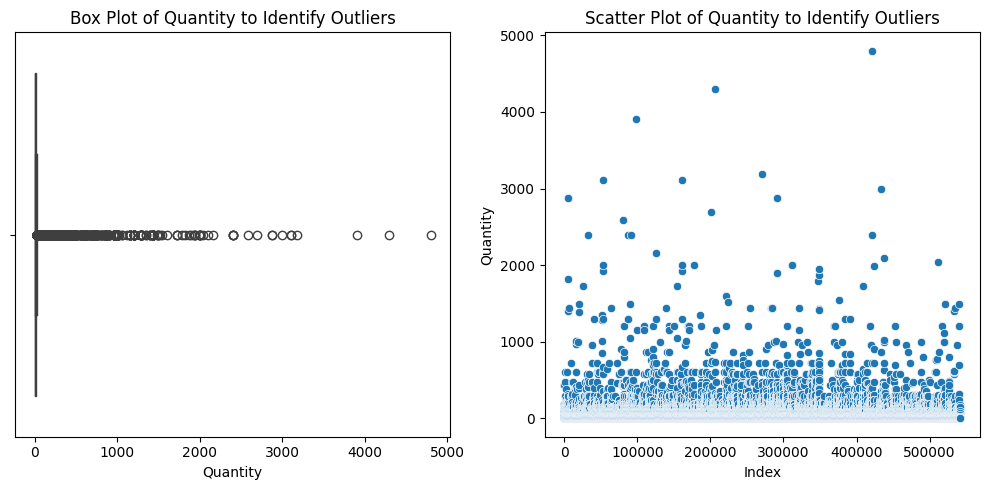

In [26]:
quantity_mask = df_sales['Quantity'] < 10000
df_sales = df_sales[quantity_mask]
box_and_scatter_plot(df_sales, 'Quantity')

#### UnitPrice

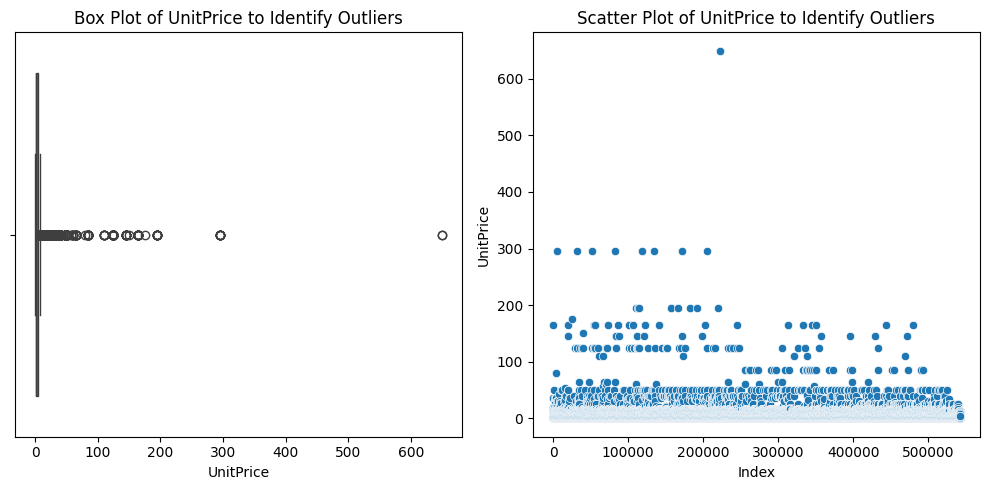

In [27]:
box_and_scatter_plot(df_sales, 'UnitPrice')

In [28]:
df_sales[df_sales['UnitPrice'] >= 250]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Time,Day,Month,Year,TotalSales,Season
4989,536835,22655,VINTAGE RED KITCHEN CABINET,1,2010-12-02 18:06:00,295.0,13145.0,United Kingdom,18:06:00,2,12,2010,295.0,Winter
32484,539080,22655,VINTAGE RED KITCHEN CABINET,1,2010-12-16 08:41:00,295.0,16607.0,United Kingdom,08:41:00,16,12,2010,295.0,Winter
51636,540647,22655,VINTAGE RED KITCHEN CABINET,1,2011-01-10 14:57:00,295.0,17406.0,United Kingdom,14:57:00,10,1,2011,295.0,Winter
82768,543253,22655,VINTAGE RED KITCHEN CABINET,1,2011-02-04 15:32:00,295.0,14842.0,United Kingdom,15:32:00,4,2,2011,295.0,Winter
118769,546480,22656,VINTAGE BLUE KITCHEN CABINET,1,2011-03-14 11:38:00,295.0,13452.0,United Kingdom,11:38:00,14,3,2011,295.0,Spring
133994,547814,22656,VINTAGE BLUE KITCHEN CABINET,1,2011-03-25 14:19:00,295.0,13452.0,United Kingdom,14:19:00,25,3,2011,295.0,Spring
171178,551393,22656,VINTAGE BLUE KITCHEN CABINET,1,2011-04-28 12:22:00,295.0,14973.0,United Kingdom,12:22:00,28,4,2011,295.0,Spring
205759,554836,22655,VINTAGE RED KITCHEN CABINET,1,2011-05-26 16:25:00,295.0,13015.0,United Kingdom,16:25:00,26,5,2011,295.0,Spring
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.5,15098.0,United Kingdom,15:28:00,10,6,2011,38970.0,Summer
222682,556446,22502,PICNIC BASKET WICKER 60 PIECES,1,2011-06-10 15:33:00,649.5,15098.0,United Kingdom,15:33:00,10,6,2011,649.5,Summer


# Plot

In [29]:
colors = ['#FFB6C1', '#FFDAB9', '#ADD8E6', '#98FB98', '#FFA07A', '#87CEFA', '#FF69B4', '#F0E68C', '#D3D3D3', '#B0C4DE']
# vector colors that I use in the plot

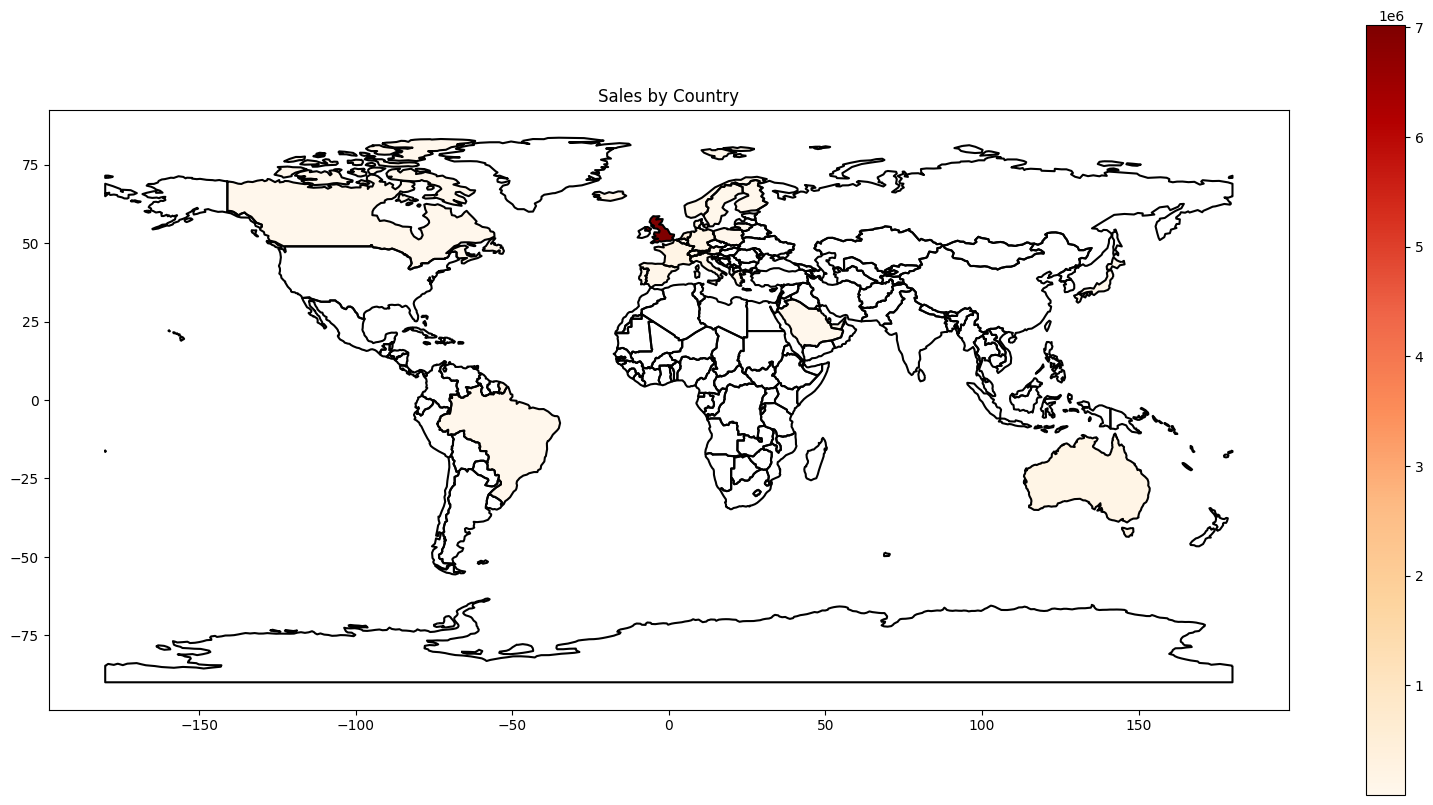

In [30]:
sales_in_the_world = df_sales.groupby('Country')['TotalSales'].sum().sort_values(ascending=False)

shapefile_path = 'dataset/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp' 
world = gpd.read_file(shapefile_path)

# Merge dei dati delle vendite con il DataFrame geopandas
world = world.merge(sales_in_the_world, how='left', left_on='NAME', right_on='Country')

# Contour plot del mondo in nero
world.boundary.plot(color='black', figsize=(20, 10))

# World map plot con i dati delle vendite evidenziati
world.plot(column='TotalSales', cmap='OrRd', legend=True, ax=plt.gca())

plt.title('Sales by Country')
plt.savefig('Sales_Country.png', dpi=600, bbox_inches='tight')
plt.show()

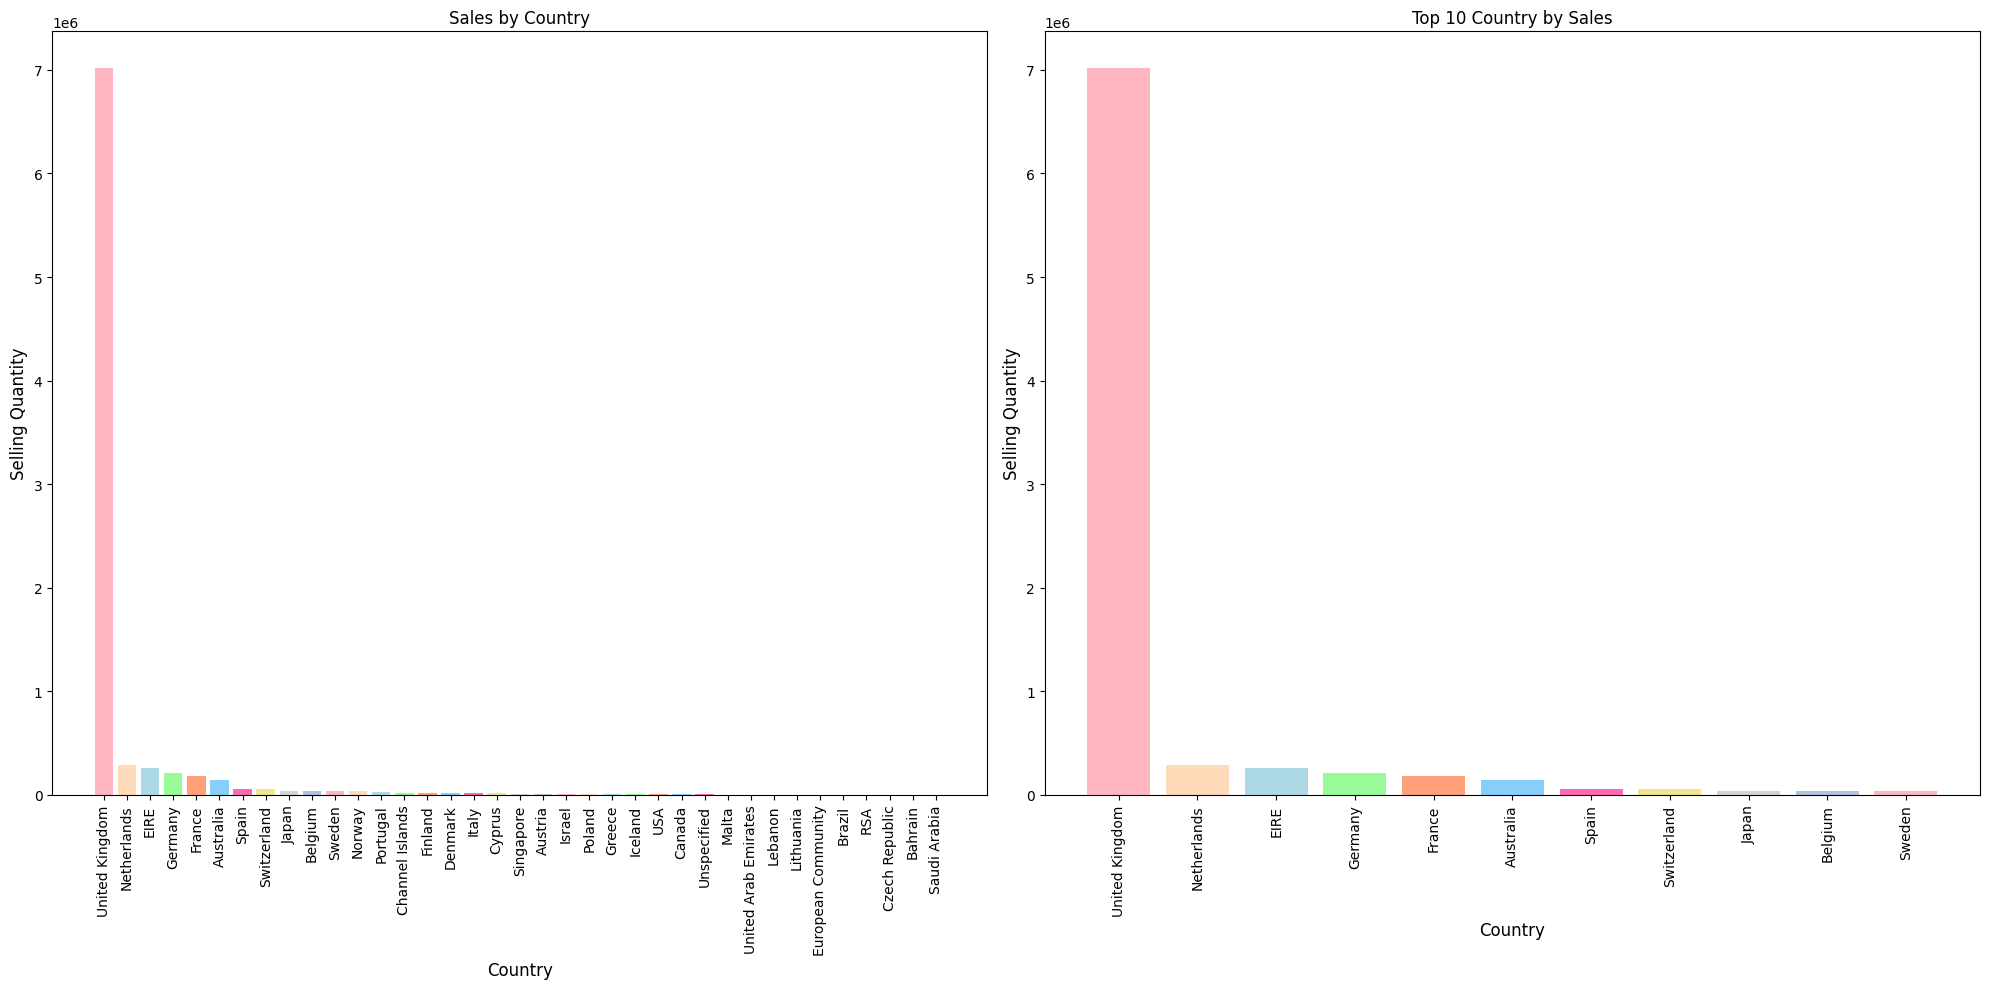

In [31]:
# Raggruppare per Paese e sommare le vendite
top_10_countries = sales_in_the_world.iloc[:11]

# Creare i subplot
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Primo grafico: vendite per paese
axs[0].bar(sales_in_the_world.index, sales_in_the_world.values, color = colors)
axs[0].set_title("Sales by Country")
axs[0].set_xlabel("Country", fontsize=12)
axs[0].set_ylabel("Selling Quantity", fontsize=12)
axs[0].tick_params(axis='x', rotation=90)

# Secondo grafico: top 10 paesi con le vendite più alte
axs[1].bar(top_10_countries.index, top_10_countries.values, color = colors)
axs[1].set_title("Top 10 Country by Sales")
axs[1].set_xlabel("Country", fontsize=12)
axs[1].set_ylabel("Selling Quantity", fontsize=12)
axs[1].tick_params(axis = 'x', rotation=90)

# Aggiungere spazi tra i subplot
plt.tight_layout()

# Mostrare i grafici
plt.show()

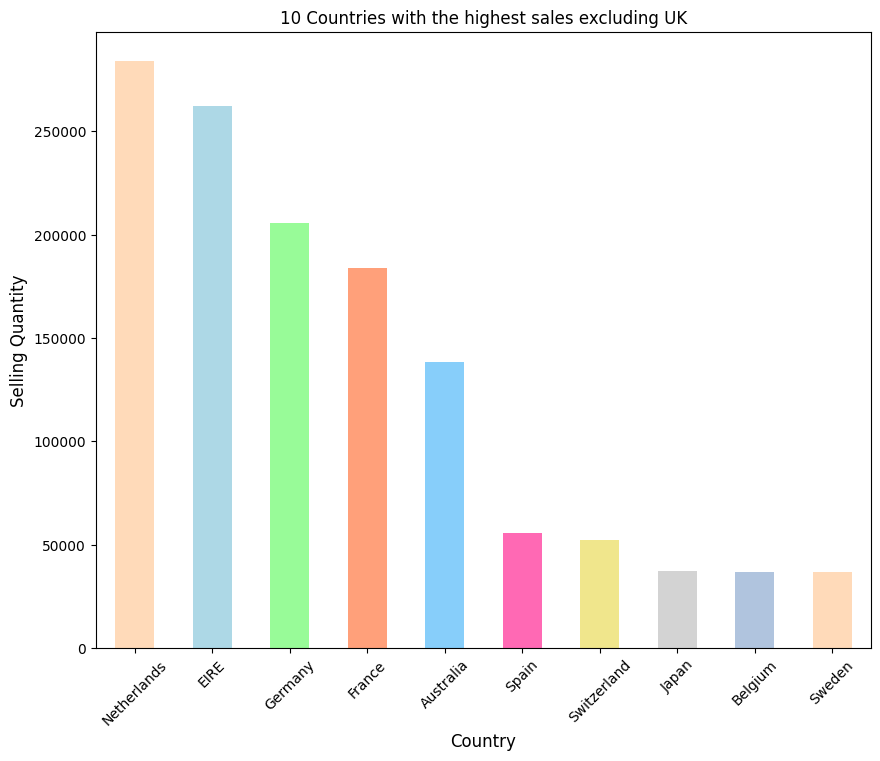

In [32]:
highest_country_sales_excluding_UK = df_sales.groupby("Country")["TotalSales"].sum().nlargest(11)
highest_country_sales_excluding_UK = highest_country_sales_excluding_UK.iloc[1:]

same_colors = colors[1:]
plt.figure(figsize=(10,8))
highest_country_sales_excluding_UK.plot(kind = "bar", color = same_colors)
plt.title("10 Countries with the highest sales excluding UK")
plt.xlabel("Country", fontsize = 12)
plt.ylabel("Selling Quantity", fontsize = 12)
plt.xticks(rotation=45)
plt.show()

/var/folders/w_/cwdg8m214xlb_c8h70fswvrc0000gn/T/ipykernel_6071/947650680.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Quantity', y = 'Description', data = top_products, palette = colors)


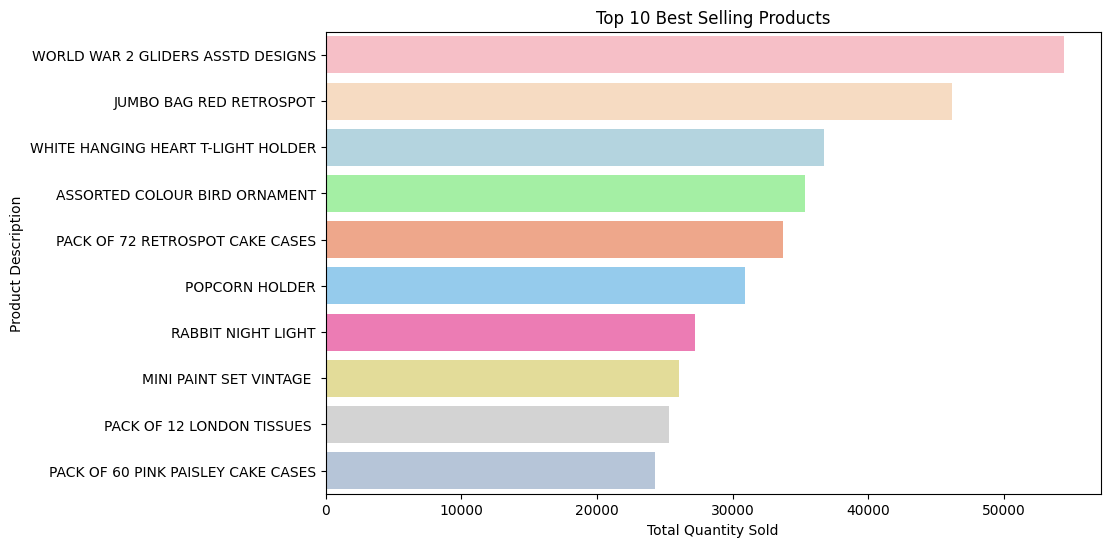

In [33]:
top_products = df_sales.groupby('Description')['Quantity'].sum().nlargest(10).reset_index()

plt.figure(figsize = (10, 6))
sns.barplot(x = 'Quantity', y = 'Description', data = top_products, palette = colors)
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Description')
plt.title('Top 10 Best Selling Products')
plt.show()

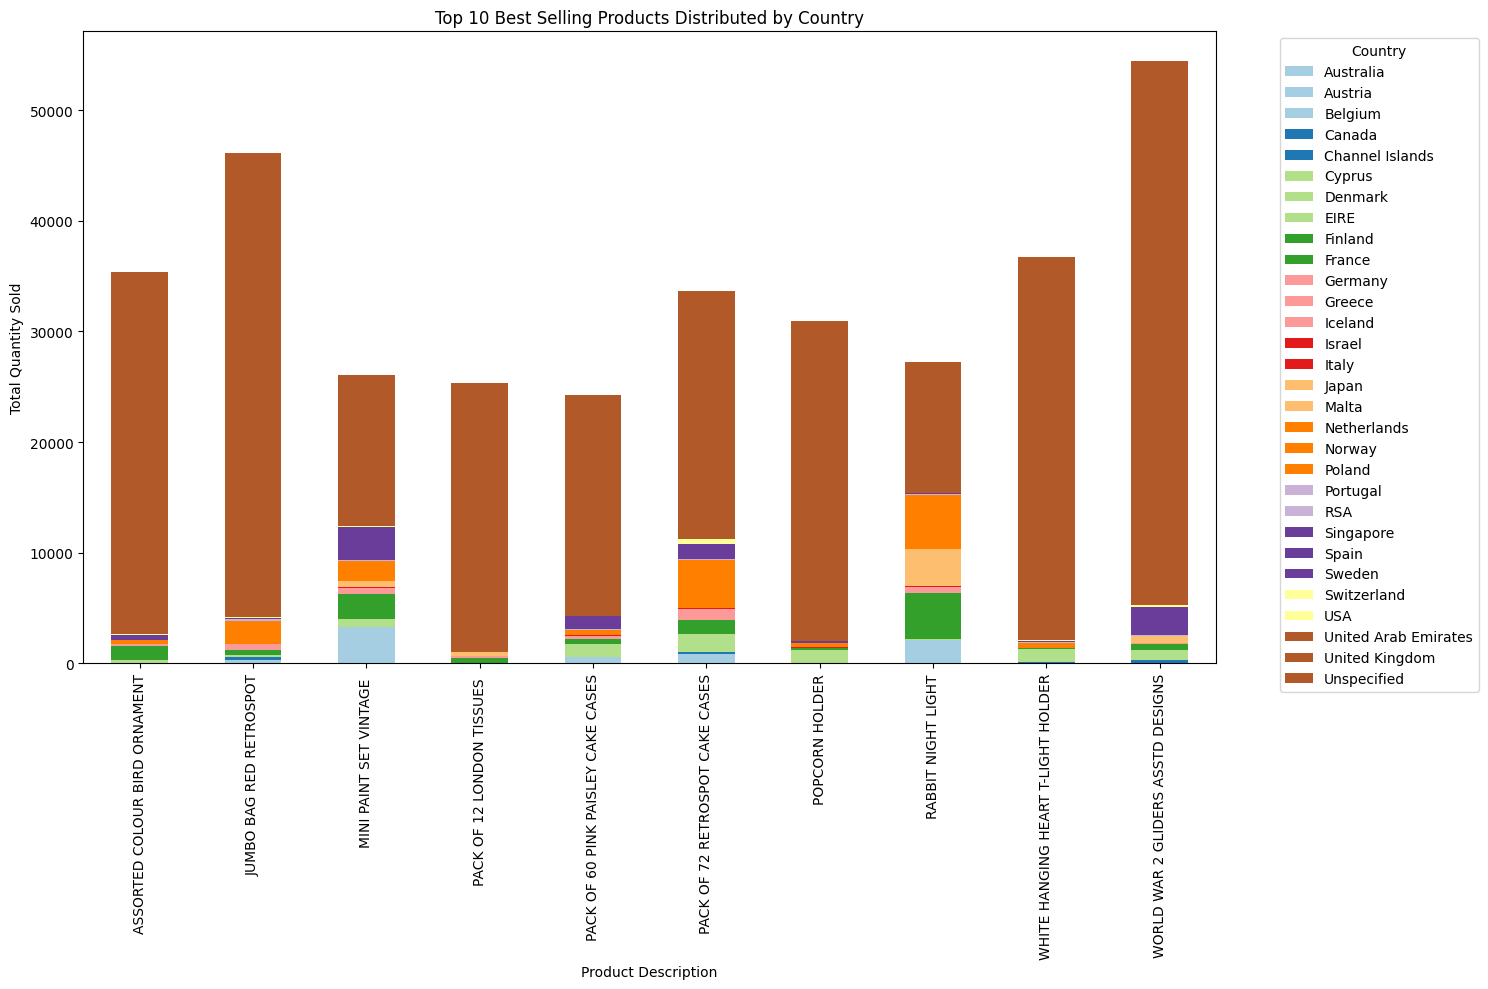

In [34]:
# Ottenere i top 10 prodotti per quantità venduta
filtered_df = df_sales[df_sales['Description'].isin(top_products['Description'])]

grouped = filtered_df.groupby(['Description', 'Country'])['Quantity'].sum().unstack().fillna(0)

# Creare un grafico a barre impilato
grouped.plot(kind='bar', stacked=True, figsize=(15, 10), colormap = 'Paired')

# Impostare i titoli e le etichette
plt.title('Top 10 Best Selling Products Distributed by Country')
plt.xlabel('Product Description')
plt.ylabel('Total Quantity Sold')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

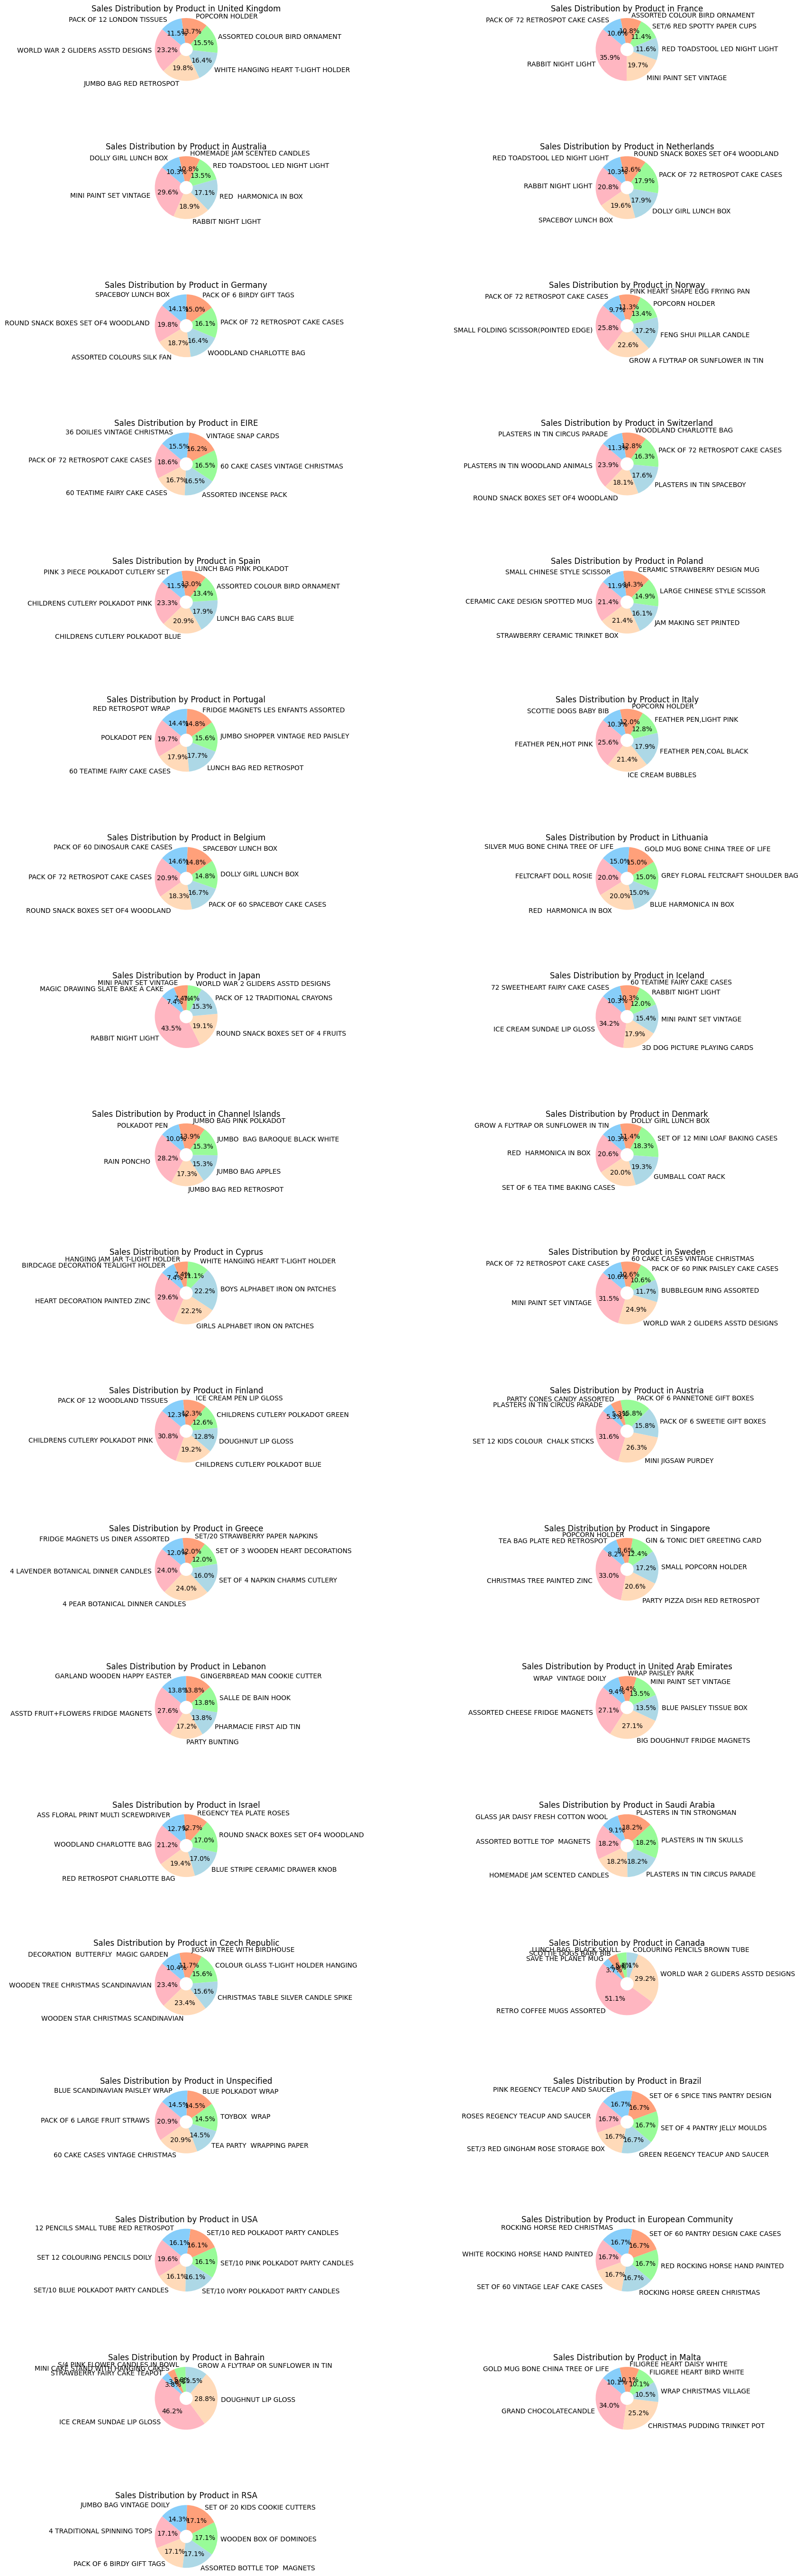

In [35]:
list_of_country = df_sales['Country'].unique()

n_cols = 2
n_rows = (len(list_of_country) // n_cols) + 1

fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 70))

# Iterare sui paesi e creare i pie plot
for i, country in enumerate(list_of_country):
    country_data = df_sales[df_sales['Country'] == country]
    product_sales_per_country = country_data.groupby('Description')['Quantity'].sum().sort_values(ascending=False)
    product_sales_per_country = product_sales_per_country[:6]

    # Creare il pie plot
    axs.flat[i].pie(product_sales_per_country.values, labels=product_sales_per_country.index, autopct='%1.1f%%', colors=colors, startangle=140)
    axs.flat[i].set_title(f'Sales Distribution by Product in {country}')
    axs.flat[i].axis('equal')

    # Aggiungere cerchio bianco al centro
    centre_circle = plt.Circle((0,0), 0.2, color='white', fc='white')
    axs.flat[i].add_artist(centre_circle)


for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axs.flat[j])

plt.subplots_adjust(wspace = 0.5, hspace = 1.0)
plt.show()

## UnitPrice

/var/folders/w_/cwdg8m214xlb_c8h70fswvrc0000gn/T/ipykernel_6071/2898556804.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_product['Date'] = pd.to_datetime(specific_product[['Year', 'Month', 'Day']])


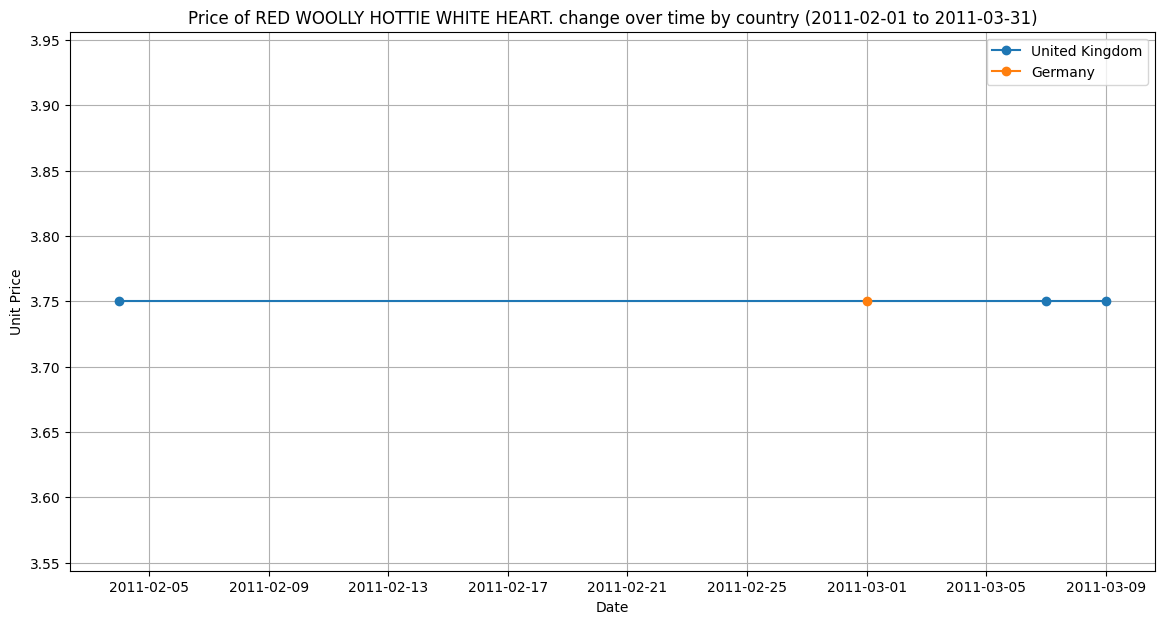

In [37]:
# Filtrare il prodotto specifico
n = int(input('Insert a number between 1 and 3873: '))
start_date = '2011-02-01'
end_date = '2011-03-31'

p = df_sales['Description'].unique()[n-1]
specific_product = df_sales[df_sales['Description'] == p]

specific_product['Date'] = pd.to_datetime(specific_product[['Year', 'Month', 'Day']])

specific_product = specific_product[(specific_product['Date'] >= start_date) & (specific_product['Date'] <= end_date)]

daily_sales = specific_product.groupby(['Date', 'Country'])['UnitPrice'].mean().reset_index()

# Creare il plot differenziando per paese
plt.figure(figsize=(14, 7))

countries = daily_sales['Country'].unique()
for country in countries:
    data_country = daily_sales[daily_sales['Country'] == country]
    plt.plot(data_country['Date'], data_country['UnitPrice'], 'o-', label=country)

plt.xlabel('Date')
plt.ylabel('Unit Price')
plt.title(f'Price of {p} change over time by country ({start_date} to {end_date})')
plt.legend()
plt.show()

# Machine learning

## Correlation matrix

In [38]:
# Function to encod the object valu of the dataset

def encoding_cl(df, df_col):
  label_encoder = LabelEncoder()
  for column in df_col:
    if df[column].dtype == 'object':
      df[column] = label_encoder.fit_transform(df[column])
  return df

In [39]:
df_sales1 = df_sales.copy()
df_col = df_sales1.columns
df_sales1 = encoding_cl(df_sales1, df_col)

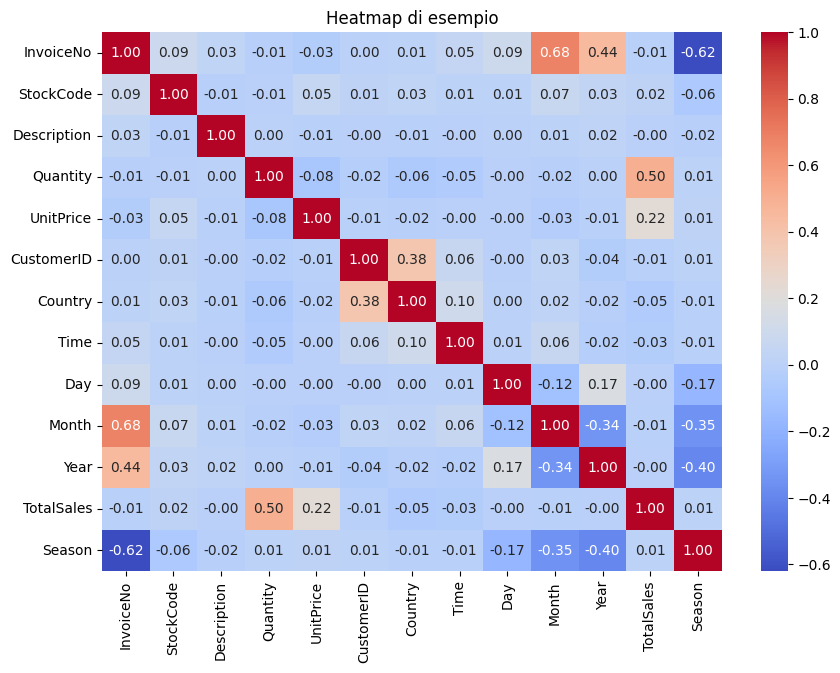

In [40]:
df_corr = df_sales1.drop(columns = ['InvoiceDate'])
df_sales_corr = df_corr.corr()

# Creazione della heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(df_sales_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap di esempio')
plt.show()

In [66]:
def prepare_data(df, target, columns_to_exclude=[]):

    # Drop 'time' column if present
    if 'InvoiceDate' in df.columns:
        df = df.drop(columns=['InvoiceDate'])

    # Dynamically select features by excluding the columns we don't need
    features = [col for col in df.columns if col not in columns_to_exclude + [target]]

    X = df[features]
    y = df[target]

    return X, y

def train_model(X_train, y_train, model):

    model.fit(X_train, y_train)
    return model

def train_and_evaluate(df, target, model, columns_to_exclude=[]):

    X, y = prepare_data(df, target, columns_to_exclude)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model_train = train_model(X_train, y_train, model)

    evaluate_and_plot(X_test, y_test, model_train, target)

def evaluate_and_plot(X_test, y_test, model, target):
    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    MSE = mean_squared_error(y_test, y_pred)
    MAE = mean_absolute_error(y_test, y_pred)
    R2_Score = r2_score(y_test, y_pred)
    intercept = model.intercept_

    results = PrettyTable()
    results.field_names = ["Metric", "Value"]
    results.add_row(["Mean Squared Error", MSE])
    results.add_row(["Mean Absolute Error", MAE])
    results.add_row(["R2 Score", R2_Score])
    results.add_row(["Intercept", intercept])
    print(results)

    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.values[:100], label='Actual')
    plt.plot(y_pred[:100], label='Predicted')
    plt.xlabel('Sample')
    plt.ylabel(target)
    plt.title(f'Actual vs Predicted {target}')
    plt.legend()
    plt.show()


    #determination of residual errors and plot
    errors = y_test - y_pred
    plt.figure(figsize=(9,5))
    plt.scatter(y_test, errors, cmap='plasma', alpha=0.8)
    plt.axhline(y=0, color='red', linestyle='--', label='Error 0')
    color_bar_3 = plt.colorbar()
    color_bar_3.set_label('Color Intensity')
    plt.title('Random Forest Regression: residual errors')
    plt.legend()
    plt.xlabel('Effective values')
    plt.ylabel('Residual errors')
    #plt.savefig('error_res.png', dpi=300, bbox_inches='tight')
    plt.show()

In [42]:
def train_and_evaluate_polynomial(X, y, model):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
    trained_model = train_model(X_train, y_train, model)
    evaluate_and_plot(X_test, y_test, trained_model, target)

In [57]:
# Define the target variable and columns to exclude
target = 'TotalSales'

Mean Squared Error: 2499.597983050519
Mean Absolute Error score is: 13.350766762329538
R2_Score score is: 0.4657469046324014
intercept -26404.294381385513
+---------------------+---------------------+
|        Metric       |        Value        |
+---------------------+---------------------+
|  Mean Squared Error |  2499.597983050519  |
| Mean Absolute Error |  13.350766762329538 |
|       R2 Score      |  0.4657469046324014 |
|      Intercept      | -26404.294381385513 |
+---------------------+---------------------+


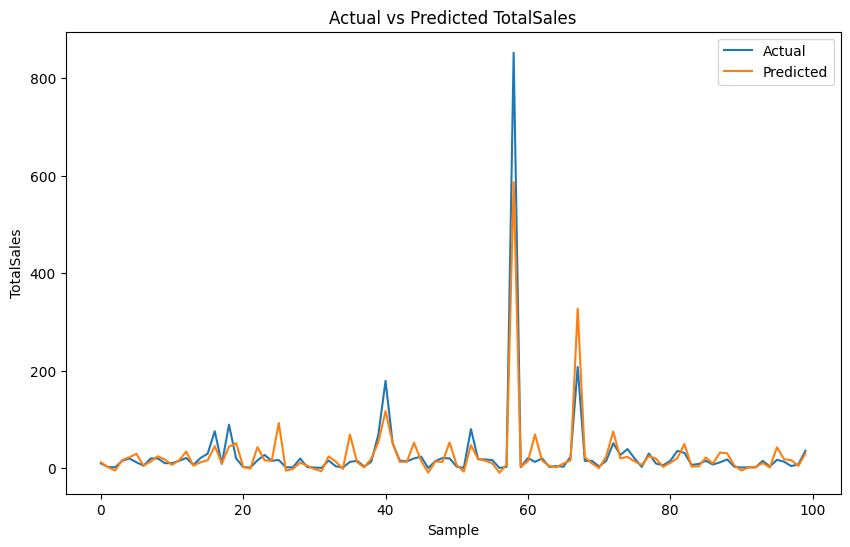

/var/folders/w_/cwdg8m214xlb_c8h70fswvrc0000gn/T/ipykernel_6071/4256123361.py:72: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(y_test, errors, cmap='plasma', alpha=0.8)


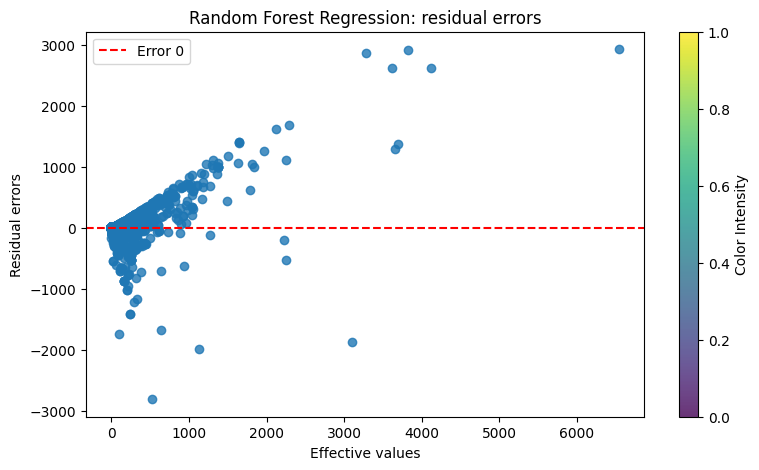

In [67]:
model = LinearRegression()

# Run the pipeline
train_and_evaluate(df_sales1, target, model)

Mean Squared Error: 120.27976053998673
Mean Absolute Error score is: 0.22087528825794445
R2_Score score is: 0.9742919322169805


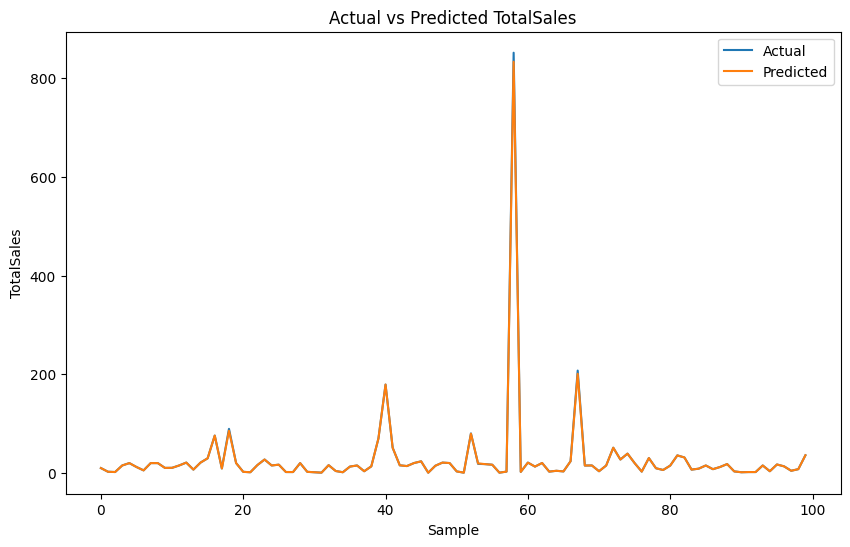

/var/folders/w_/cwdg8m214xlb_c8h70fswvrc0000gn/T/ipykernel_6071/1280876806.py:56: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(y_test, errors, cmap='plasma', alpha=0.8)


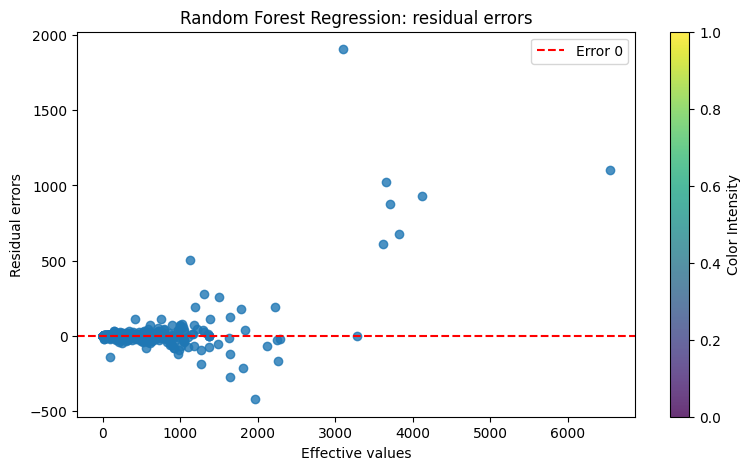

In [45]:
model = RandomForestRegressor()

# Run the pipeline
train_and_evaluate(df_sales1, target, model)

Mean Squared Error: 101.2005708925056
Mean Absolute Error score is: 2.7341154953842532
R2_Score score is: 0.9783698344218114


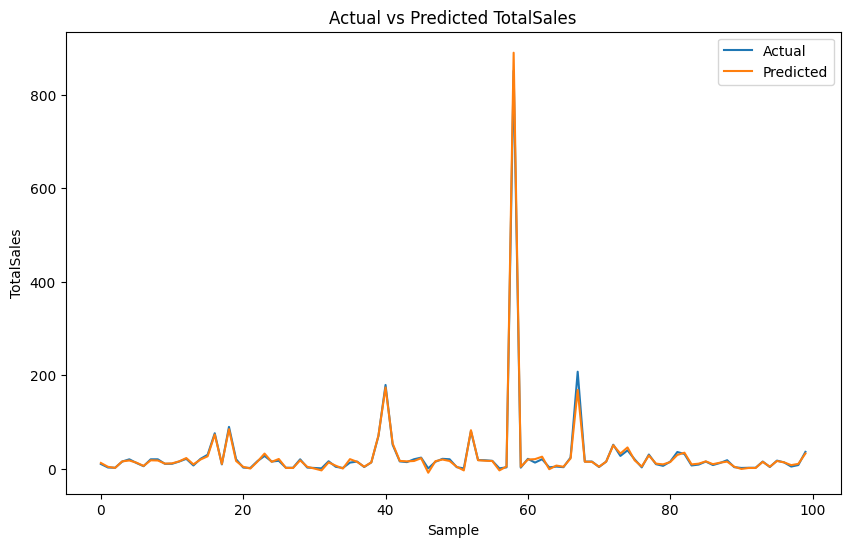

/var/folders/w_/cwdg8m214xlb_c8h70fswvrc0000gn/T/ipykernel_6071/1280876806.py:56: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(y_test, errors, cmap='plasma', alpha=0.8)
/Users/elisaottoboni/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


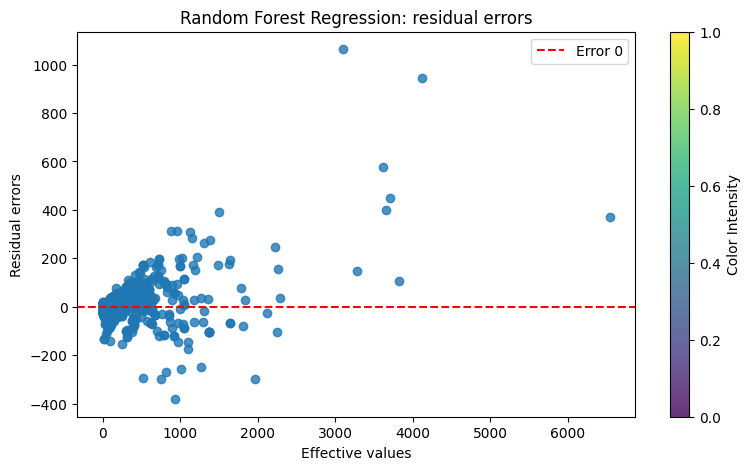

In [46]:
model = GradientBoostingRegressor(n_estimators = 100, random_state = 42)

# Run the pipeline
train_and_evaluate(df_sales1, target, model)

Mean Squared Error: 1.501410930020629e-22
Mean Absolute Error score is: 1.0290341719683893e-11
R2_Score score is: 1.0


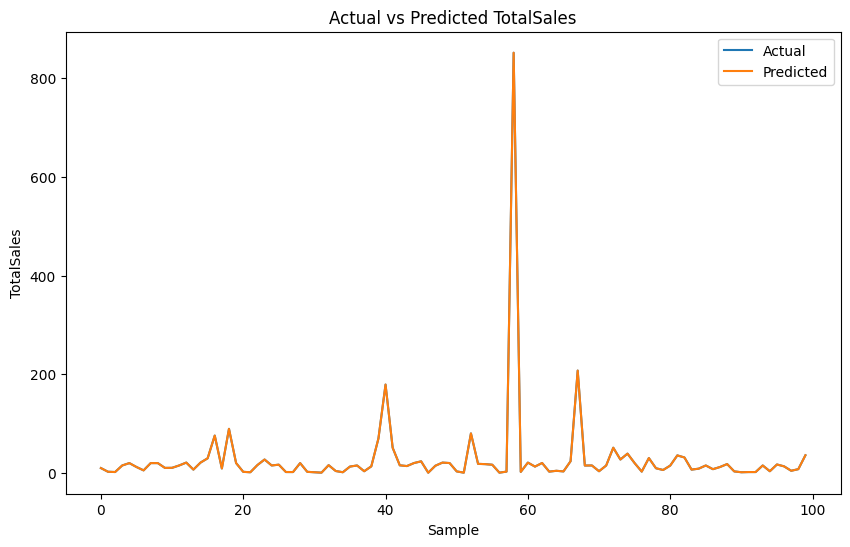

/var/folders/w_/cwdg8m214xlb_c8h70fswvrc0000gn/T/ipykernel_6071/1280876806.py:56: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(y_test, errors, cmap='plasma', alpha=0.8)


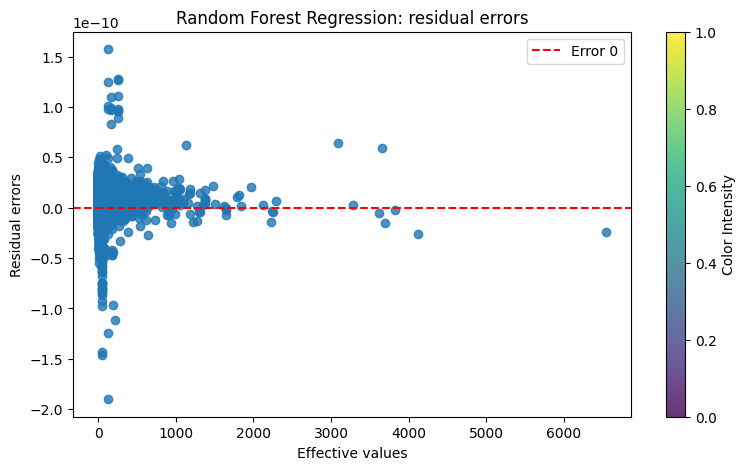

In [47]:
# Prepare the data
X, y = prepare_data(df_sales1, target)

# Apply Polynomial Features transformation
degree = 2
poly = PolynomialFeatures(degree = degree, include_bias = False)
X_polynomial = poly.fit_transform(X)

# Choose the model you want to use
model = LinearRegression()  # Example model

# Run the pipeline
train_and_evaluate_polynomial(X_polynomial, y, model)

In [48]:
# Define the target variable and columns to exclude
target = 'UnitPrice'

Mean Squared Error: 14.404900711646427
Mean Absolute Error score is: 1.918712272721271
R2_Score score is: 0.05435665099570863


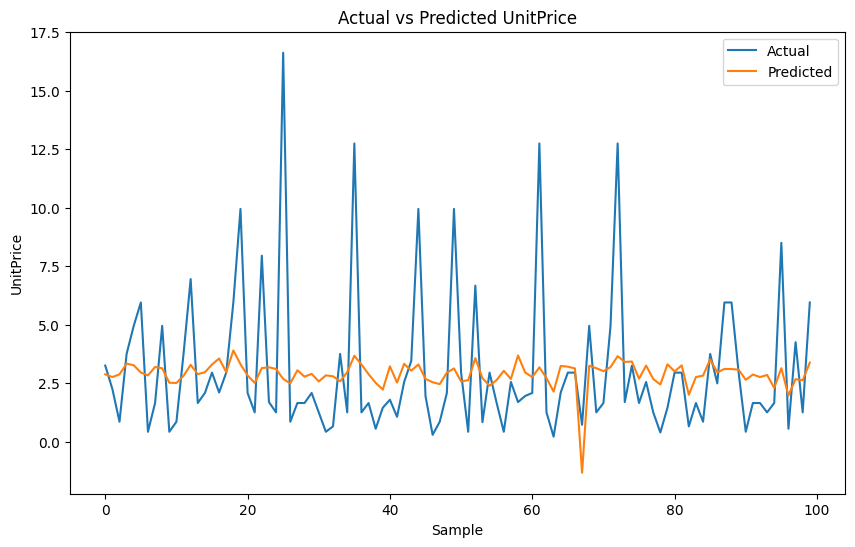

/var/folders/w_/cwdg8m214xlb_c8h70fswvrc0000gn/T/ipykernel_6071/1280876806.py:56: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(y_test, errors, cmap='plasma', alpha=0.8)


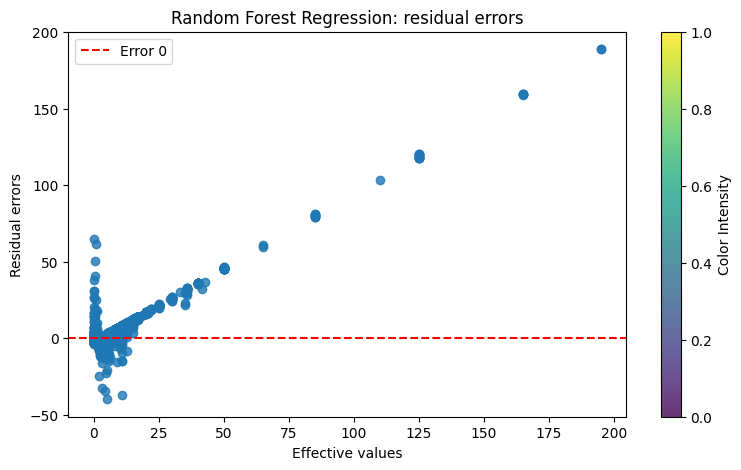

In [49]:
model = LinearRegression()

# Run the pipeline
train_and_evaluate(df_sales1, target, model)

In [51]:
df_sales1.drop(columns = ['InvoiceDate'])
X = df_sales1.drop(['Quantity'],axis=1) #dataframe without the rating feature
Y = df_sales1['Quantity'] #rating feature

In [52]:
#cross validation
#split the data into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
#print the shape of our train and testing sets
print('training set shape:',X_train.shape, Y_train.shape)
print('testing set shape:',X_test.shape, Y_test.shape)

training set shape: (317212, 13) (317212,)
testing set shape: (79304, 13) (79304,)


In [55]:
#build the model
lr = LinearRegression()
#train the model
lr.fit(X_train, Y_train)

DTypePromotionError: The DType <class 'numpy.dtypes.DateTime64DType'> could not be promoted by <class 'numpy.dtypes.Float64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>)

In [ ]:
#predict on the testing set
#Y_pred are predicted values of the target variable based on the features
Y_pred = lr.predict(X_test)

In [ ]:
#evaluate the perfomance of the model
r2 = r2_score(Y_test,Y_pred)
mse = mean_squared_error(Y_test,Y_pred)
mae = mean_absolute_error(Y_test,Y_pred)
intercept = lr.intercept_
print('R2 score',r2)
print('mean squared error',mse)
print('mean absolute error',mae)
print('intercept',intercept)

In [ ]:
plt.figure(figsize=(9,5))
colors = np.linspace(0, 1, len(Y_test))
plt.scatter(Y_test,Y_pred,c=colors,cmap='viridis',alpha=0.8,label='Data Points')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Multilinear Regression: Actual vs. Predicted")
z1 = np.polyfit(Y_test, Y_pred, 1)
p1 = np.poly1d(z1)
plt.plot(Y_test, p1(Y_test), color='red', label='Trendline',linestyle='--')
color_bar = plt.colorbar()
color_bar.set_label('Color Intensity')
print('R2 score',r2)
plt.text(5, 0.6, f'R2 score:{r2.round(4)}', fontsize=10, color='red', ha='right', va='bottom')
plt.legend()
#plt.savefig('multilinear6.png', dpi=300, bbox_inches='tight')
plt.show()